In [ ]:
## Distil-Bert Model

In [1]:
# You need some imports, so run this cell. 
# You will do some more imports later. 
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pandas as pd

In [2]:
import os

os.chdir(r'C:\Users\jeffd\Documents\Studying\Statistical Software\Final Project')
os.getcwd()

'C:\\Users\\jeffd\\Documents\\Studying\\Statistical Software\\Final Project'

In [3]:
DB_df = pd.read_excel(r'C:\Users\jeffd\Documents\Studying\Statistical Software\Final Project\Input_project_v11_age.xlsx')

In [4]:
DB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10850 entries, 0 to 10849
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              10850 non-null  int64 
 1   age_group        10850 non-null  object
 2   status           10850 non-null  object
 3   sex              10850 non-null  object
 4   orientation      10850 non-null  object
 5   body_type        10163 non-null  object
 6   diet             7044 non-null   object
 7   drinks           10850 non-null  object
 8   drinks_freq      10850 non-null  int64 
 9   drugs            8703 non-null   object
 10  education        10850 non-null  object
 11  education_group  10850 non-null  object
 12  ethnicity        10088 non-null  object
 13  height           10850 non-null  int64 
 14  job              10850 non-null  object
 15  job_group        10850 non-null  object
 16  last_online      10850 non-null  object
 17  location         10850 non-null

In [42]:
DB_df = DB_df[DB_df['Bio'].notna()]
DB_df = DB_df[DB_df['drinks_freq'].notna()]

In [43]:
print(DB_df[0:5])

   age age_group  status sex orientation       body_type               diet  \
0   22     18_22  single   m    straight  a little extra  strictly anything   
1   22     18_22  single   f    straight        athletic                NaN   
2   22     18_22  single   m    straight             fit    mostly anything   
3   20     18_22  single   f    straight         average  mostly vegetarian   
4   21     18_22  single   m    straight            thin                NaN   

     drinks  drinks_freq  drugs  ...    job_group       last_online  \
0  socially            1  never  ...  blue_collar  2012-06-28-20-30   
1  socially            1  never  ...      student  2012-06-15-22-56   
2  socially            1  never  ...     business  2012-06-10-01-37   
3  socially            1  never  ...  blue_collar  2012-06-30-00-00   
4  socially            1    NaN  ...     s.t.e.m.  2012-06-29-22-10   

                          location                               offspring  \
0  south san francis

In [44]:
all_data_DB = []
all_labels_DB = [] 

all_data_DB = DB_df['Bio'].tolist()
all_labels_DB = DB_df['drinks_freq'].tolist()


In [45]:
## Key Index for reference 

## 0 is no drinking, 1 is drinking
'''
if DB_df['drinks'] == 'desparately':
    all_labels_DB['num_labels'] = 1
if DB_df['drinks'] == 'not at all':
    all_labels_DB['num_labels'] = 2
if DB_df['drinks'] == 'often':
    all_labels_DB['num_labels'] = 3
if DB_df['drinks'] == 'rarely':
    all_labels_DB['num_labels'] = 4
if DB_df['drinks'] == 'socially':
    all_labels_DB['num_labels'] = 5
if DB_df['drinks'] == 'very often':
    all_labels_DB['num_labels'] = 6
'''

"\nif DB_df['drinks'] == 'desparately':\n    all_labels_DB['num_labels'] = 1\nif DB_df['drinks'] == 'not at all':\n    all_labels_DB['num_labels'] = 2\nif DB_df['drinks'] == 'often':\n    all_labels_DB['num_labels'] = 3\nif DB_df['drinks'] == 'rarely':\n    all_labels_DB['num_labels'] = 4\nif DB_df['drinks'] == 'socially':\n    all_labels_DB['num_labels'] = 5\nif DB_df['drinks'] == 'very often':\n    all_labels_DB['num_labels'] = 6\n"

In [46]:
len(all_data_DB)

10551

In [47]:
len(all_labels_DB)

10551

In [48]:
type(all_data_DB)

list

In [49]:
type(all_labels_DB)

list

In [50]:
# extract a 80-20 split for train and validation sets
X_train_DB, X_valid_DB, y_train_DB, y_valid_DB = (train_test_split(all_data_DB, all_labels_DB, test_size=0.2))

In [51]:
len(X_train_DB)

8440

In [52]:
len(X_valid_DB)

2111

In [53]:
len(y_train_DB)

8440

In [54]:
len(y_valid_DB)

2111

In [55]:
type(y_valid_DB)

list

In [56]:
from transformers import DistilBertTokenizerFast

# Instantiate DistilBERT tokenizer...we use the Fast version to optimize runtime
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

In [57]:
# Define the maximum number of words to tokenize (DistilBERT can tokenize up to 512)
MAX_LENGTH = 128


# Define function to encode text data in batches
def batch_encode(tokenizer, texts, batch_size=256, max_length=MAX_LENGTH):
    """""""""
    A function that encodes a batch of texts and returns the texts'
    corresponding encodings and attention masks that are ready to be fed 
    into a pre-trained transformer model.
    
    Input:
        - tokenizer:   Tokenizer object from the PreTrainedTokenizer Class
        - texts:       List of strings where each string represents a text
        - batch_size:  Integer controlling number of texts in a batch
        - max_length:  Integer controlling max number of words to tokenize in a given text
    Output:
        - input_ids:       sequence of texts encoded as a tf.Tensor object
        - attention_mask:  the texts' attention mask encoded as a tf.Tensor object
    """""""""
    
    input_ids = []
    attention_mask = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer.batch_encode_plus(batch,
                                             max_length=max_length,
                                             padding='longest', #implements dynamic padding
                                             truncation=True,
                                             return_attention_mask=True,
                                             return_token_type_ids=False
                                             )
        input_ids.extend(inputs['input_ids'])
        attention_mask.extend(inputs['attention_mask'])
    
    
    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_mask)
    
    
# Encode X_train
X_train_ids_DB, X_train_attention_DB = batch_encode(tokenizer, X_train_DB)

# Encode X_valid
X_valid_ids_DB, X_valid_attention_DB = batch_encode(tokenizer, X_valid_DB)

# Encode X_test

## X_test_ids, X_test_attention = batch_encode(tokenizer, X_test.tolist())

In [59]:
from transformers import TFDistilBertModel, DistilBertConfig

DISTILBERT_DROPOUT = 0.2
DISTILBERT_ATT_DROPOUT = 0.2
 
# Configure DistilBERT's initialization
config = DistilBertConfig(dropout=DISTILBERT_DROPOUT, 
                          attention_dropout=DISTILBERT_ATT_DROPOUT, 
                          output_hidden_states=True)
                          
# The bare, pre-trained DistilBERT transformer model outputting raw hidden-states 
# and without any specific head on top.
distilBERT = TFDistilBertModel.from_pretrained('distilbert-base-uncased', config=config)

# Make DistilBERT layers untrainable
for layer in distilBERT.layers:
    layer.trainable = False

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'activation_13', 'vocab_transform', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [60]:
MAX_LENGTH = 128
LAYER_DROPOUT = 0.2
LEARNING_RATE = 5e-5
RANDOM_STATE = 42

def build_model(transformer, max_length=MAX_LENGTH):
    """
    Template for building a model off of the BERT or DistilBERT architecture
    for a binary classification task.
    
    Input:
      - transformer:  a base Hugging Face transformer model object (BERT or DistilBERT)
                      with no added classification head attached.
      - max_length:   integer controlling the maximum number of encoded tokens 
                      in a given sequence.
    
    Output:
      - model:        a compiled tf.keras.Model with added classification layers 
                      on top of the base pre-trained model architecture.
    """
    
    # Define weight initializer with a random seed to ensure reproducibility
    weight_initializer = tf.keras.initializers.GlorotNormal(seed=RANDOM_STATE) 
    
    # Define input layers
    input_ids_layer = tf.keras.layers.Input(shape=(max_length,), 
                                            name='input_ids', 
                                            dtype='int32')
    input_attention_layer = tf.keras.layers.Input(shape=(max_length,), 
                                                  name='input_attention', 
                                                  dtype='int32')
    
    # DistilBERT outputs a tuple where the first element at index 0
    # represents the hidden-state at the output of the model's last layer.
    # It is a tf.Tensor of shape (batch_size, sequence_length, hidden_size=768).
    last_hidden_state = transformer([input_ids_layer, input_attention_layer])[0]
    
    # We only care about DistilBERT's output for the [CLS] token, 
    # which is located at index 0 of every encoded sequence.  
    # Splicing out the [CLS] tokens gives us 2D data.
    cls_token = last_hidden_state[:, 0, :]
    
    ##                                                 ##
    ## Define additional dropout and dense layers here ##
    ##                                                 ##
    
    # Define a single node that makes up the output layer (for binary classification)
    output = tf.keras.layers.Dense(1, 
                                   activation='sigmoid',
                                   kernel_initializer=weight_initializer,  
                                   kernel_constraint=None,
                                   bias_initializer='zeros'
                                   )(cls_token)
    
    # Define the model
    model = tf.keras.Model([input_ids_layer, input_attention_layer], output)
    
    # Compile the model
    model.compile(tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [61]:
# After you initialize the base model and add a classification head,
# invoke the build_model function to make an instance of your model
model = build_model(distilBERT)

In [62]:
EPOCHS = 4
BATCH_SIZE = 64
## NUM_STEPS = len(X_train.index) // BATCH_SIZE

# Train the model
train_history1 = model.fit(
    x = [X_train_ids_DB, X_train_attention_DB],
    y = np.asarray(y_train_DB),
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    ## steps_per_epoch = NUM_STEPS,
    validation_data = ([X_valid_ids_DB, X_valid_attention_DB], np.asarray(y_valid_DB)),
    verbose=1
)

Epoch 1/4
132/132 [==============================] - 1779s 13s/step - loss: 0.4962 - accuracy: 0.8135 - val_loss: 0.4593 - val_accuracy: 0.8271
Epoch 2/4
132/132 [==============================] - 1603s 12s/step - loss: 0.4845 - accuracy: 0.8139 - val_loss: 0.4595 - val_accuracy: 0.8271
Epoch 3/4
132/132 [==============================] - 1693s 13s/step - loss: 0.4832 - accuracy: 0.8139 - val_loss: 0.4586 - val_accuracy: 0.8271
Epoch 4/4
132/132 [==============================] - 1867s 14s/step - loss: 0.4830 - accuracy: 0.8137 - val_loss: 0.4579 - val_accuracy: 0.8271


In [66]:
import matplotlib.pyplot as plt

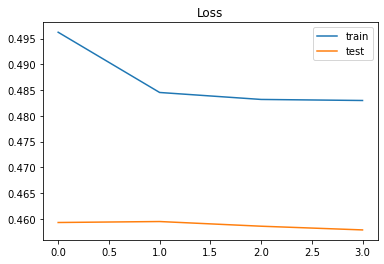

In [71]:
plt.title('Loss')
plt.plot(train_history1.history['loss'], label='train')
plt.plot(train_history1.history['val_loss'], label='test')
plt.legend()
plt.show();

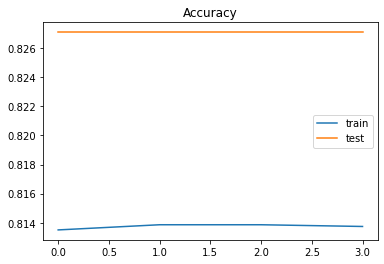

In [72]:
plt.title('Accuracy')
plt.plot(train_history1.history['accuracy'], label='train')
plt.plot(train_history1.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [70]:
FT_EPOCHS = 4
BATCH_SIZE = 64
## NUM_STEPS = len(X_train.index)

# Unfreeze distilBERT layers and make available for training
for layer in distilBERT.layers:
    layer.trainable = True
    
# Recompile model after unfreezing
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
train_history2 = model.fit(
    x = [X_train_ids_DB, X_train_attention_DB],
    y = np.asarray(y_train_DB),
    epochs = FT_EPOCHS,
    batch_size = BATCH_SIZE,
    ## steps_per_epoch = NUM_STEPS,
    validation_data = ([X_valid_ids_DB, X_valid_attention_DB],  np.asarray(y_valid_DB)),
    verbose=1
)

Epoch 1/4
132/132 [==============================] - 4112s 31s/step - loss: 0.4724 - accuracy: 0.8137 - val_loss: 0.4407 - val_accuracy: 0.8271
Epoch 2/4
132/132 [==============================] - 7416s 56s/step - loss: 0.4385 - accuracy: 0.8128 - val_loss: 0.4507 - val_accuracy: 0.8271
Epoch 3/4
132/132 [==============================] - 3762s 28s/step - loss: 0.4002 - accuracy: 0.8235 - val_loss: 0.4559 - val_accuracy: 0.8190
Epoch 4/4
132/132 [==============================] - 3760s 28s/step - loss: 0.3379 - accuracy: 0.8533 - val_loss: 0.5020 - val_accuracy: 0.8063


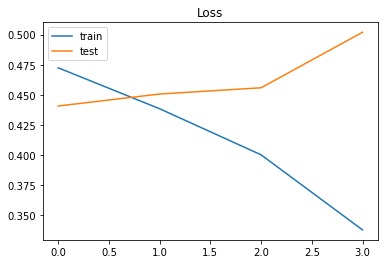

In [73]:
plt.title('Loss')
plt.plot(train_history2.history['loss'], label='train')
plt.plot(train_history2.history['val_loss'], label='test')
plt.legend()
plt.show();

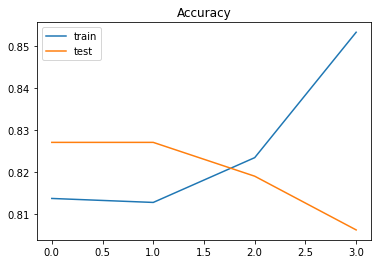

In [74]:
plt.title('Accuracy')
plt.plot(train_history2.history['accuracy'], label='train')
plt.plot(train_history2.history['val_accuracy'], label='test')
plt.legend()
plt.show();